In [2]:
import math
import numpy as np


In [3]:
# make the grid
Nx = 101 # number of x grid points for u
xmax = 20 # x max value
xmin = 0  # x min value
dx = xmax/(Nx-1.) #x-grid width
#start at x = 0
xu = [dx*i for i in range(Nx)] # x-grid for u
C = 1 #CFL condition, 0 < C <= 1
dt = C * dx # t grid width, given by dt = C*dx (CFL condition)
tmax = 1
tmin = 0
Nt = int((tmax-tmin)/dt) # number of t-grid points for u
#start at t = 0
tu = [dt*j for j in range(Nt)] #t-grid for u

In [4]:
u0 = [math.sin((math.pi*2*x)/(8*math.pi)) for x in xu]

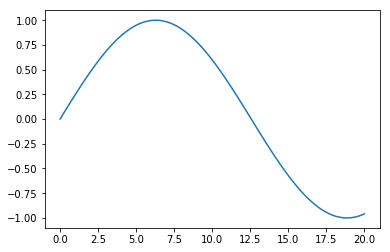

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xu,u0)

In [6]:
# set physical parameter:
a = 1 # diffusion coefficient (?)

In [7]:
u1 = [u0[i] - a*dt*((u0[i+1]-u0[i-1])/(2*dx))+((a**2)*(dt**2))/2+(u0[i+1]-2*u0[i]+u0[i-1])/(dx**2) for i in range(1,Nx-1)]

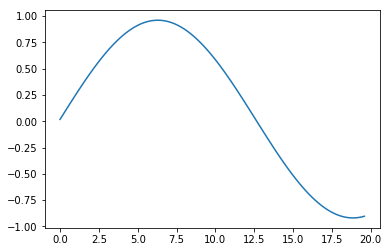

In [8]:
plt.plot(xu[:len(xu)-2],u1)

In [49]:
u = []
u.append(u0)
print("Nx len")
print(Nx)
print("u0 len")
print(len(u0))
u1 = [u[0][i] - a*dt*((u[0][i+1]-u[0][i-1])/(2*dx))+((a**2)*(dt**2))/2+(u[0][i+1]-2*u[0][i]+u[0][i-1])/(dx**2) for i in range(1,Nx-1)]
print("u1 len")
print(len(u1))
u.append(u1)
u2 = [u1[i] - a*dt*((u1[i+1]-u1[i-1])/(2*dx))+((a**2)*(dt**2))/2+(u1[i+1]-2*u1[i]+u1[i-1])/(dx**2) for i in range(1,Nx-3)]
print("u2 len")
print(len(u2))

Nx len
101
u0 len
101
u1 len
99
u2 len
97


In [43]:
u = []
u.append(u0)
for j in range(1,Nt):
    #here we lost some points and get list index out of range error
    ux = [u[j-1][i] - a*dt*((u[j-1][i+1]-u[j-1][i-1])/(2*dx))+((a**2)*(dt**2))/2+(u[j-1][i+1]-2*u[j-1][i]+u[j-1][i-1])/(dx**2) for i in range(1,Nx-2*j)]
    u.append(ux)

In [50]:
u = []
u.append(u0)
for j in range(1,Nt):
    for i in range(1,Nx-2*j):
        ux = [u[j-1][i] - a*dt*((u[j-1][i+1]-u[j-1][i-1])/(2*dx))+((a**2)*(dt**2))/2+(u[j-1][i+1]-2*u[j-1][i]+u[j-1][i-1])/(dx**2) for i in range(1,Nx-2*j)]
    u.append(ux)

In [56]:
def plot(u,time):
    plt.plot(xu[:len(xu)-2*time -1],u[time])

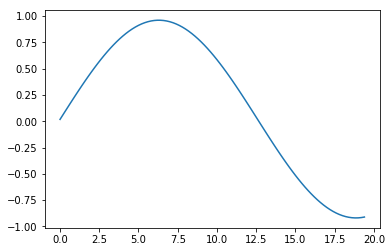

In [57]:
plot(u,1)